# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Spring 2020

## Garrett Chan (ggchan2)

### Part I: Hybrid Images

In [129]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [130]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [131]:
im1_file = './pics/einstein.jpg'
im2_file = './pics/dog.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


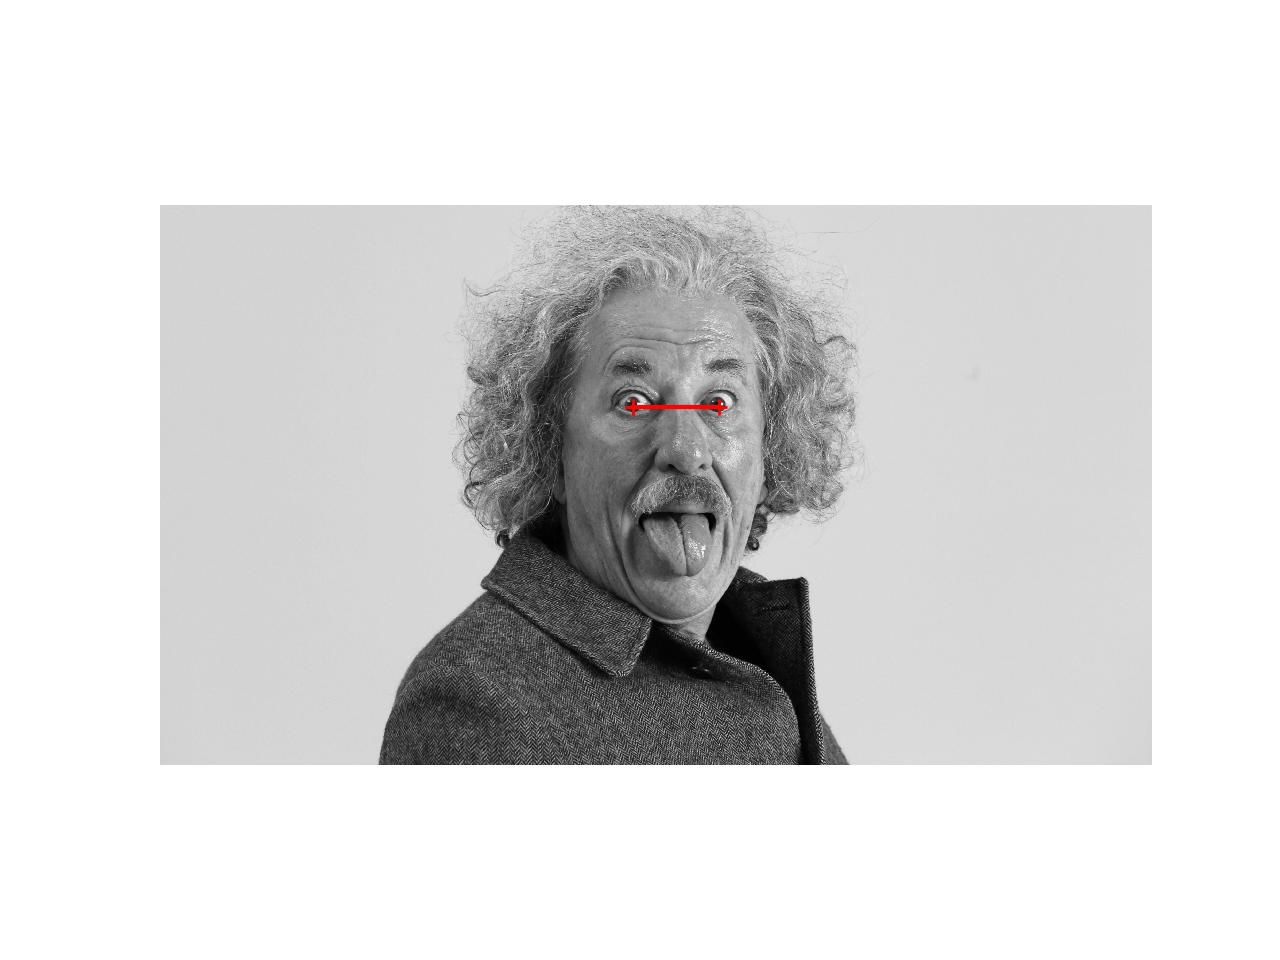

In [132]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


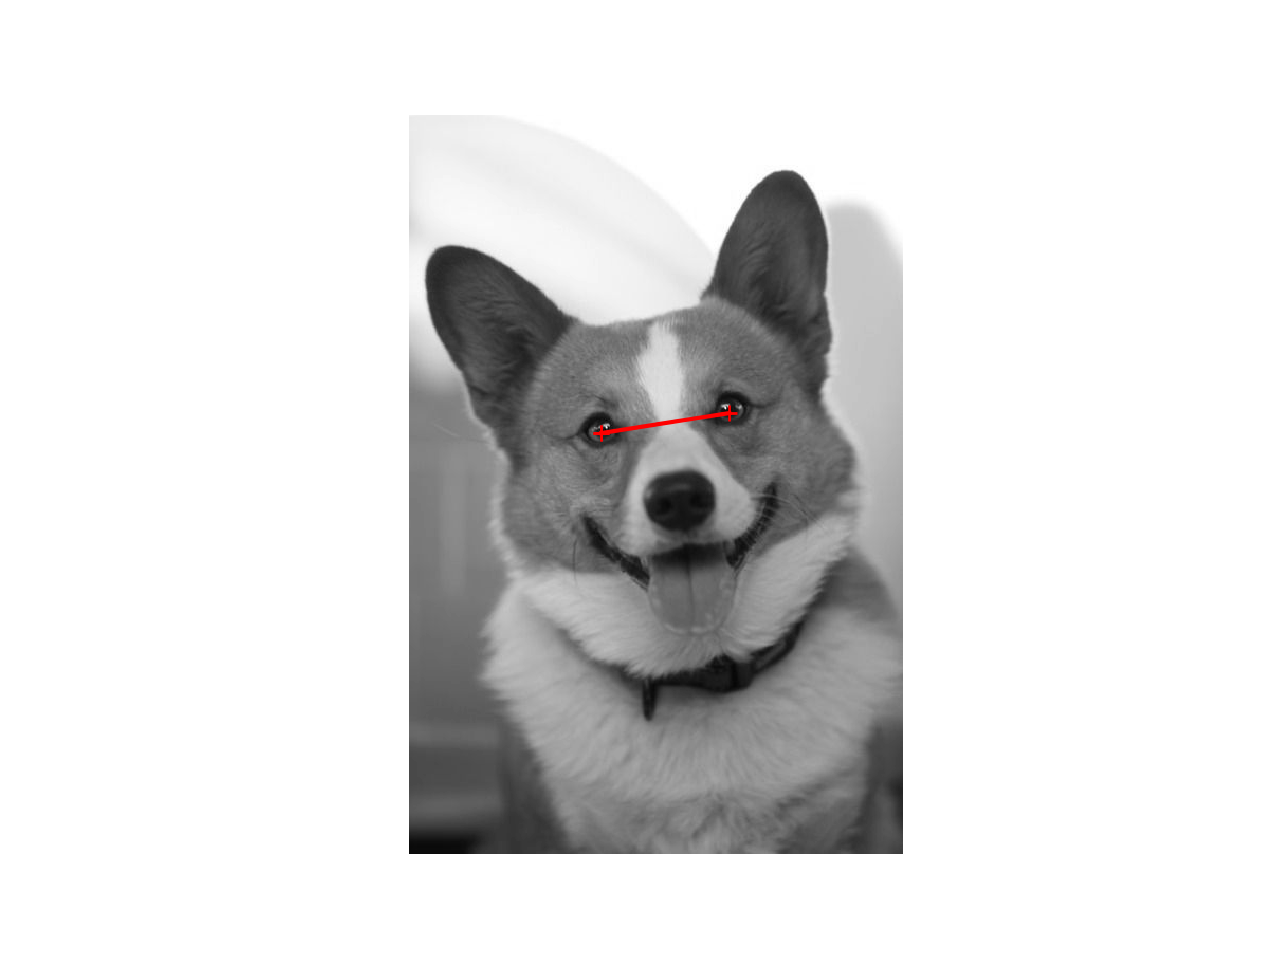

In [133]:
pts_im2 = utils.prompt_eye_selection(im2)

In [134]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [135]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


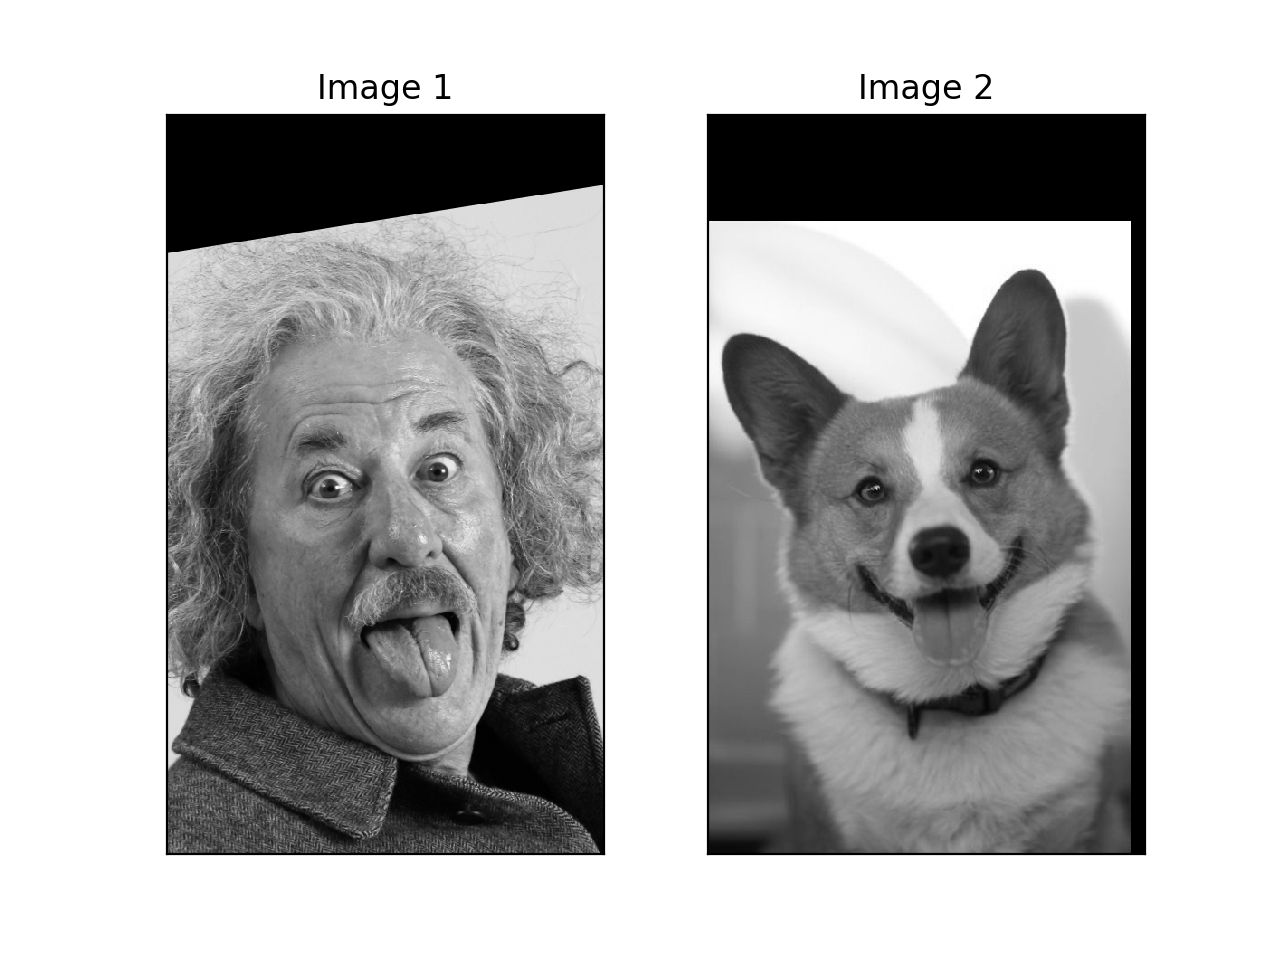

<IPython.core.display.Javascript object>


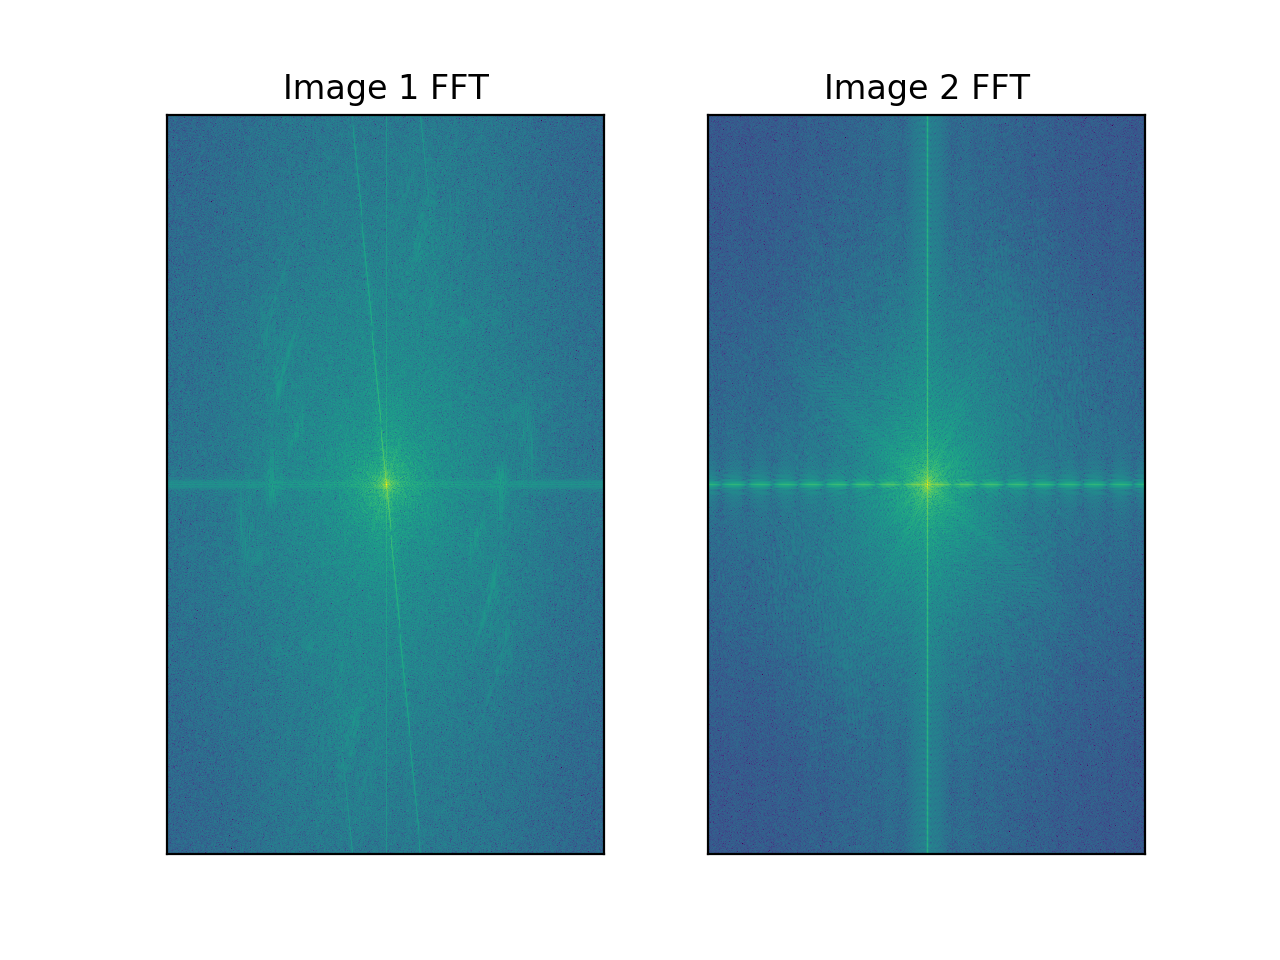

In [136]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

fft_im1 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1))))
fft_im2 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2))))

fig, axes = plt.subplots(1, 2)
axes[0].imshow(fft_im1)
axes[0].set_title('Image 1 FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(fft_im2)
axes[1].set_title('Image 2 FFT'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [137]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    ''' 
    '''
    high_pass_im = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high, 5 * cutoff_high), boundary='symm', mode='same')
    low_pass_im = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low, 3 * cutoff_low), boundary='symm', mode='same')
    '''
    
    high_pass_im = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high, 4 * cutoff_high), boundary='symm', mode='same')
    low_pass_im = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low, 4 * cutoff_low), boundary='symm', mode='same')
    
    fft_high = np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_im))))
    fft_low = np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_im))))
    
    hybrid = high_pass_im + low_pass_im
    
    fig, axes = plt.subplots(1, 3)
    axes[0].imshow(high_pass_im, cmap='gray')
    axes[0].set_title('High Pass'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(low_pass_im,cmap='gray')
    axes[1].set_title('Low Pass'), axes[1].set_xticks([]), axes[1].set_yticks([]);
    axes[2].imshow(hybrid, cmap='gray')
    axes[2].set_title('Hybrid'), axes[2].set_xticks([]), axes[2].set_yticks([]);
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(fft_high)
    axes[0].set_title('High Pass FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(fft_low)
    axes[1].set_title('Low Pass FFT'), axes[1].set_xticks([]), axes[1].set_yticks([]);

    return hybrid


<IPython.core.display.Javascript object>


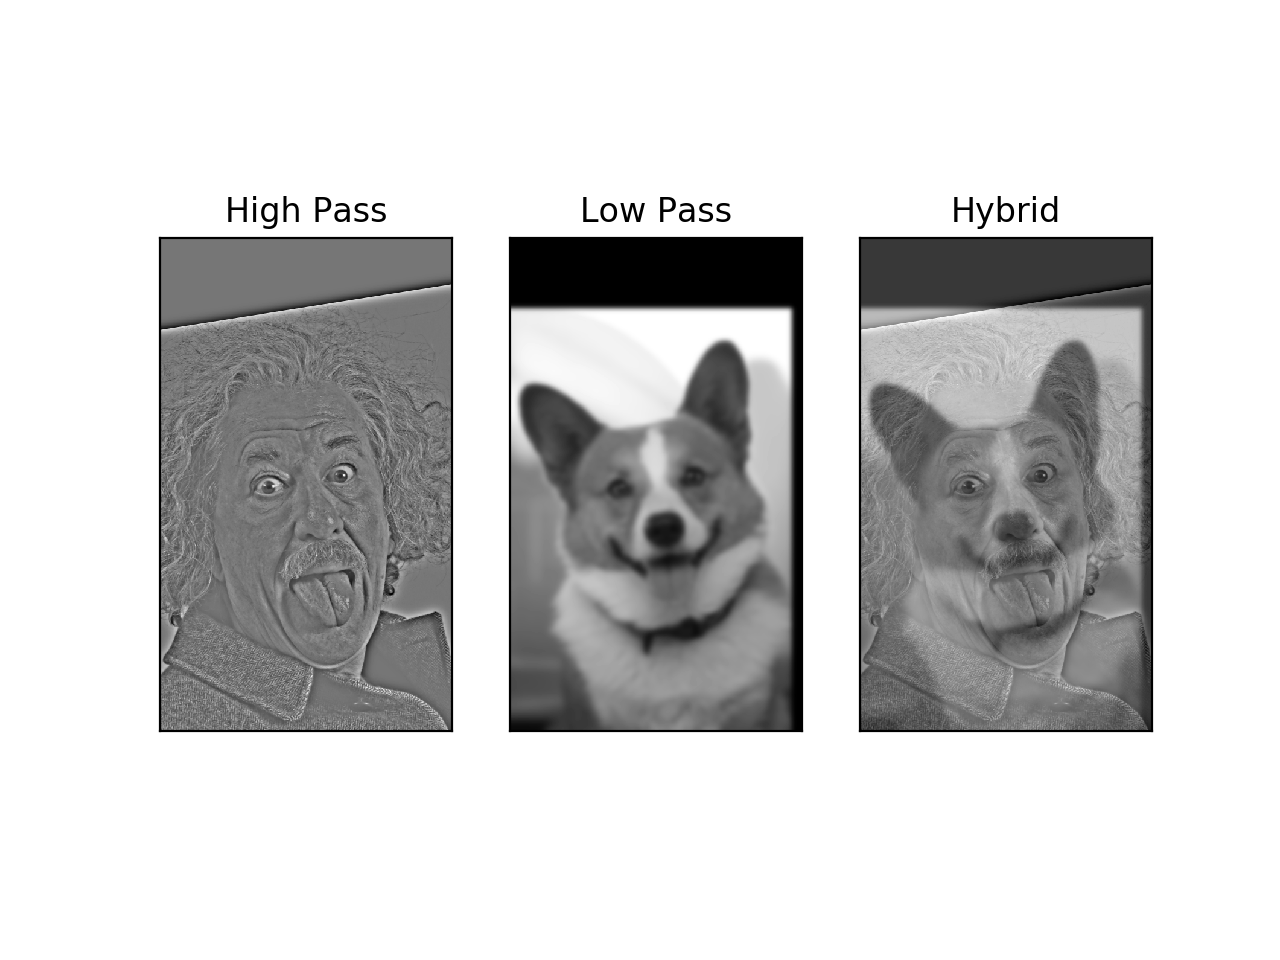

<IPython.core.display.Javascript object>


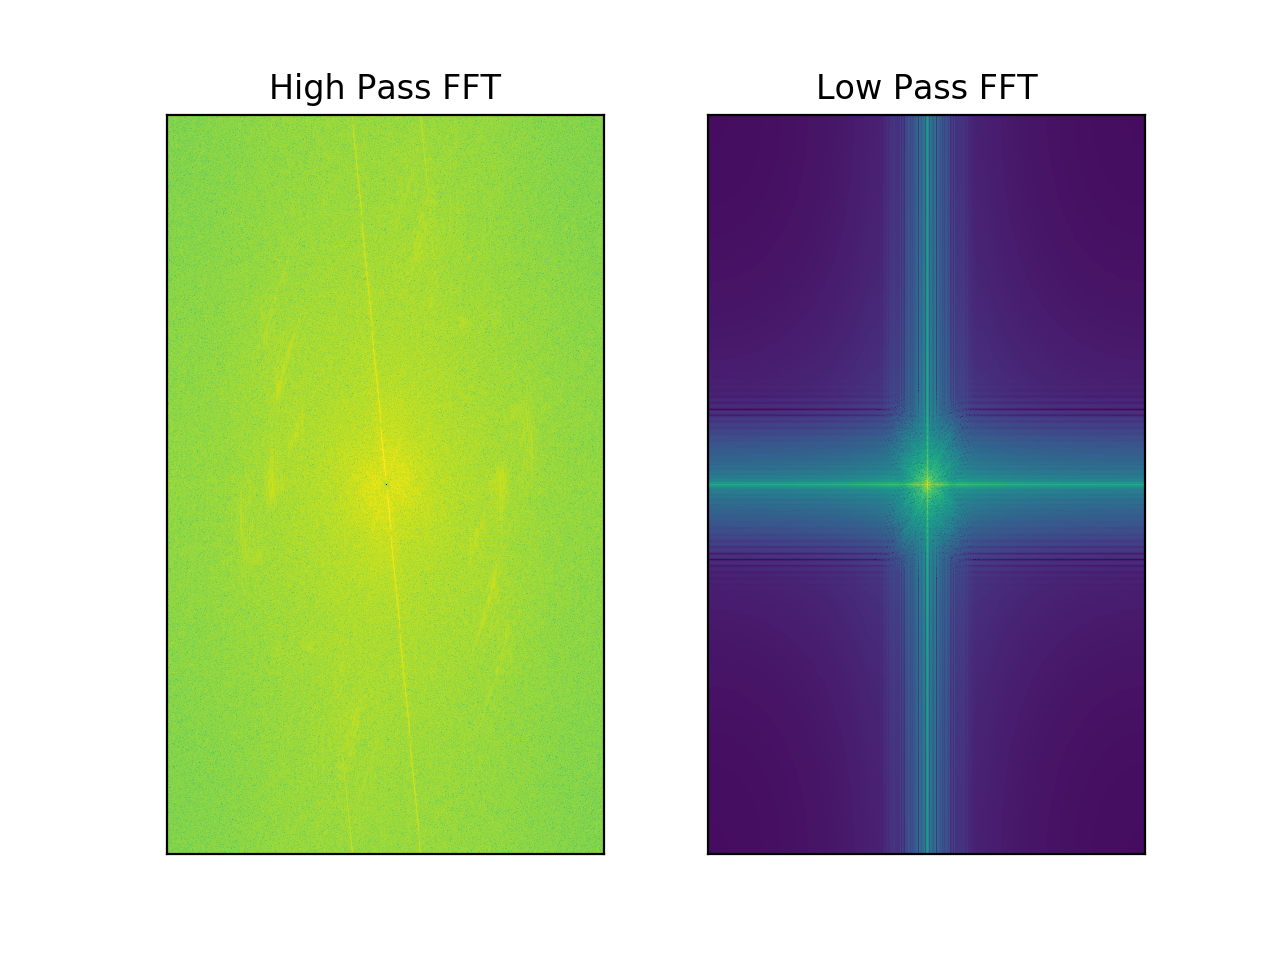

In [138]:
arbitrary_value = 4  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = 4
cutoff_high = 8

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

The hybrid imaginge works by aligning two images in a similar orientation. A Gaussian filter is applied to the picture of Einstein to get all of the high frequency information. The picture of a corgi has a low pass filter applied to it to extract all of the low frequency details. By adding up their values, a hybrid image is created.

The parameters were found by trial and error. I continually tried new values and ratios to generate hybrid images. I did a visual test by viewing the image from afar and from up close.

The Einstein Corgi combination is my favorite generated image so far as it came out very well, and I think the image is pretty funny. The two individual photos also lined up very well, with little noise carrying over from adjusting the orientation of the images.

<IPython.core.display.Javascript object>


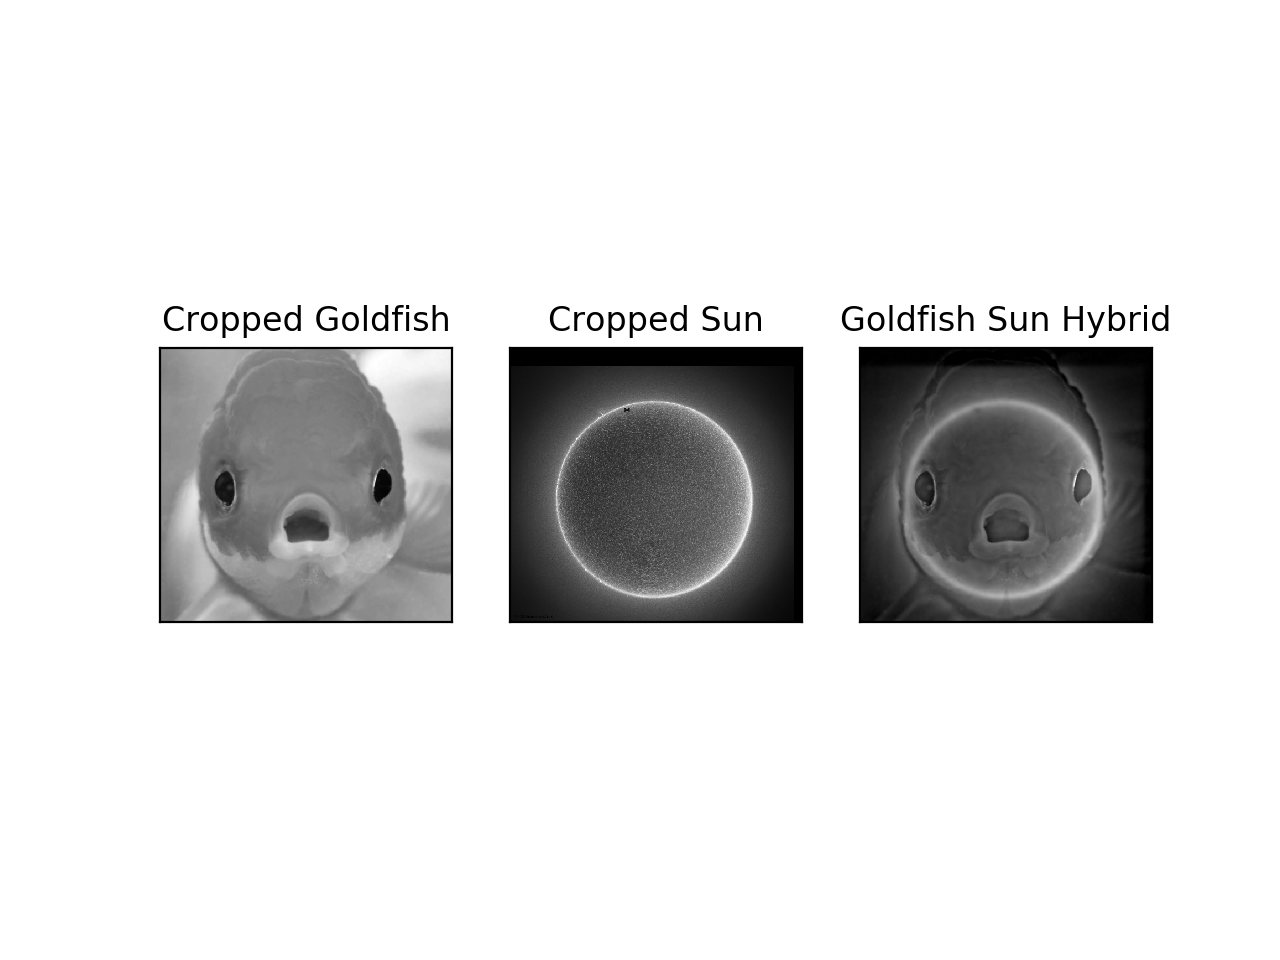

(Text(0.5, 1.0, 'Goldfish Sun Hybrid'), [], [])

In [140]:
good_im1 = cv2.imread('./pics/goldfish_cropped.jpg', cv2.IMREAD_GRAYSCALE)
good_im2 = cv2.imread('./pics/sun_cropped.jpg', cv2.IMREAD_GRAYSCALE)
good_hybrid = cv2.imread('./pics/goldfish_sun.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(good_im1, cmap='gray')
axes[0].set_title('Cropped Goldfish'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(good_im2, cmap='gray')
axes[1].set_title('Cropped Sun'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(good_hybrid, cmap='gray')
axes[2].set_title('Goldfish Sun Hybrid'), axes[2].set_xticks([]), axes[2].set_yticks([])

My intention was to create the sun from Teletubbies, but with a silly image of a fish. The hybrid image of a gold fish and a sun came out pretty well. While from far away, some of the features of the goldfish stand out, the low frequency and high frequency properties hold true. Up close, the goldfish dominates the image, while from far away, the sun (albeit with a mouth and some eyes) is more apparent.

<IPython.core.display.Javascript object>


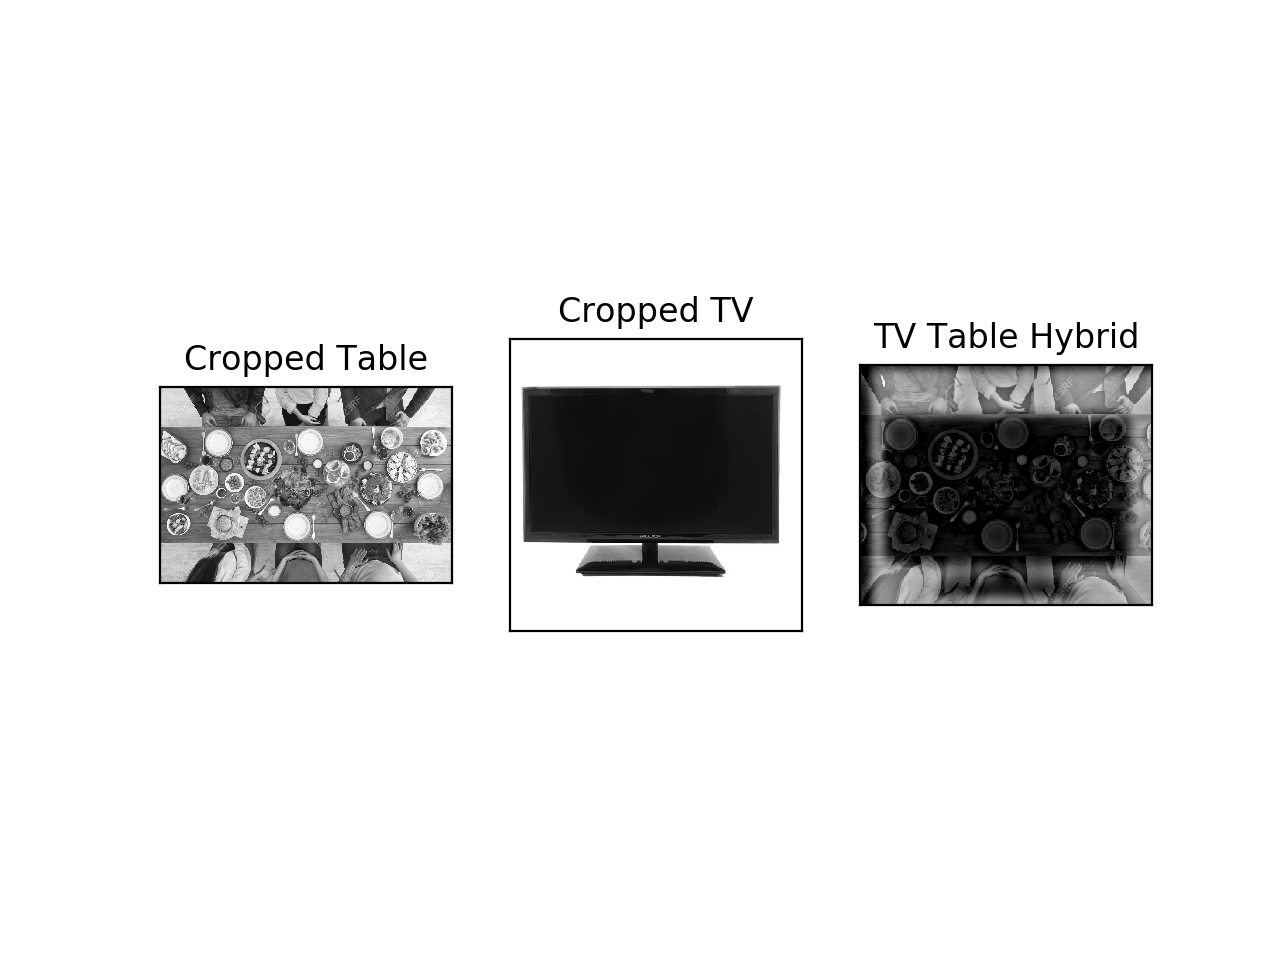

(Text(0.5, 1.0, 'TV Table Hybrid'), [], [])

In [139]:
bad_im1 = cv2.imread('./pics/table.jpg', cv2.IMREAD_GRAYSCALE)
bad_im2 = cv2.imread('./pics/tv.jpg', cv2.IMREAD_GRAYSCALE)
bad_hybrid = cv2.imread('./pics/table_tv.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(bad_im1, cmap='gray')
axes[0].set_title('Cropped Table'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(bad_im2, cmap='gray')
axes[1].set_title('Cropped TV'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(bad_hybrid, cmap='gray')
axes[2].set_title('TV Table Hybrid'), axes[2].set_xticks([]), axes[2].set_yticks([])

I tried to merge the contents of the table onto the TV screen. It didn't work nearly as planned. The TV is so dark that it dominates the nicely lit and finer details of the Table.

<IPython.core.display.Javascript object>


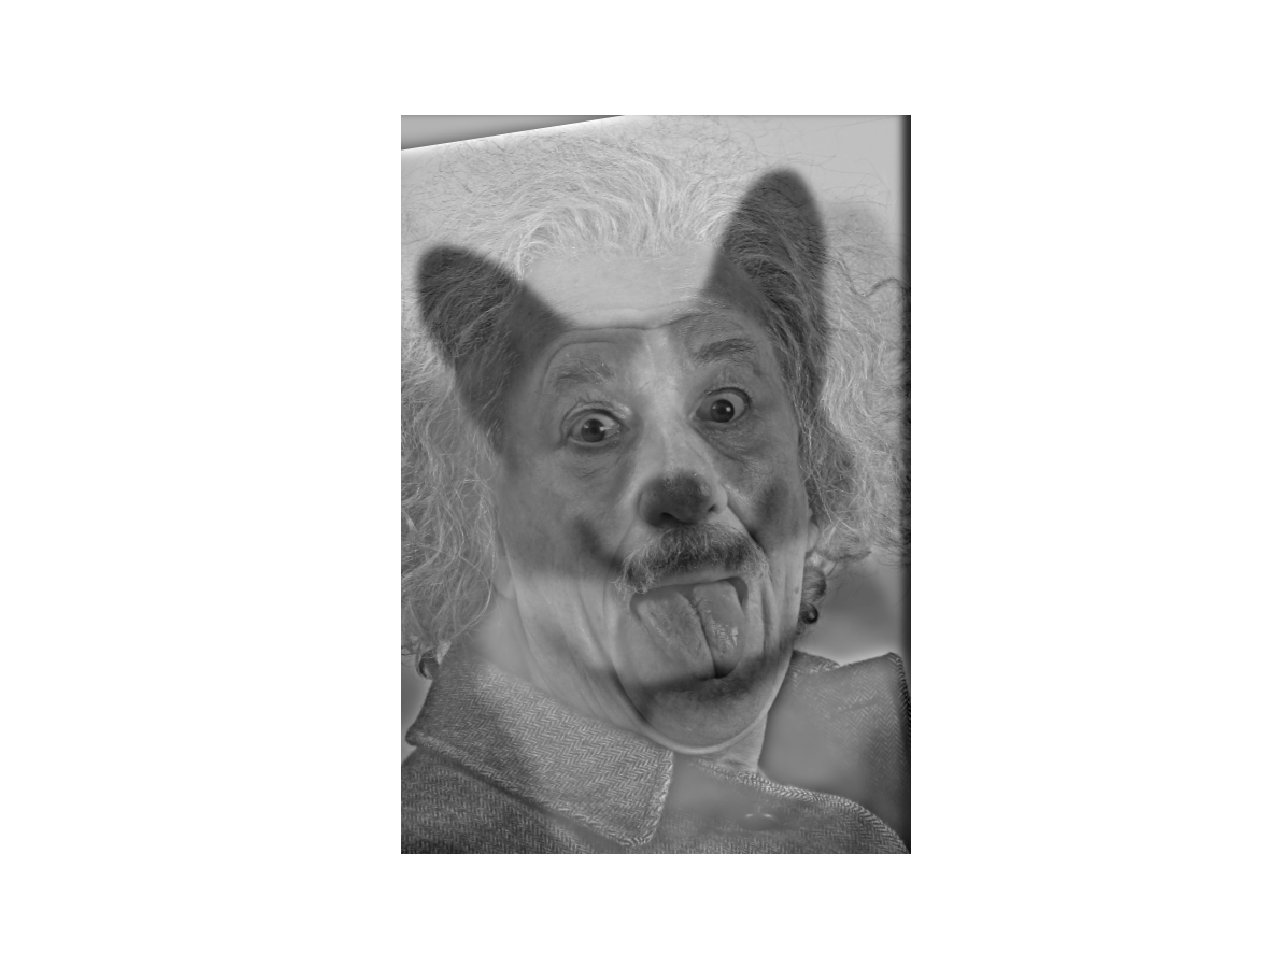

In [141]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }


cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


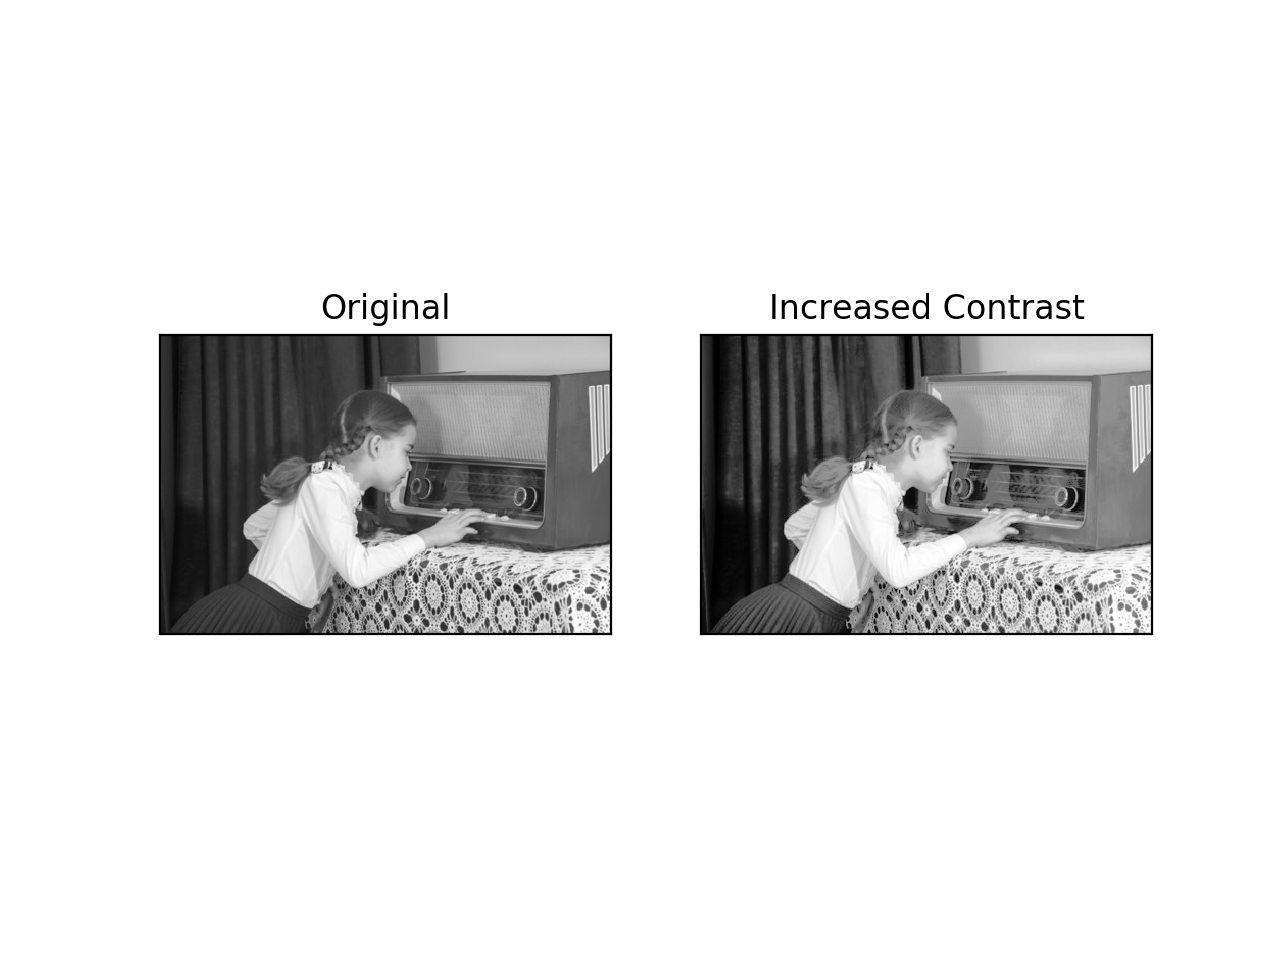

In [142]:
import cv2

image = cv2.imread("./pics/radiogirl.jpg", cv2.IMREAD_GRAYSCALE)

hist = cv2.equalizeHist(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hist = cv2.cvtColor(hist, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[0].set_title('Original'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hist)
axes[1].set_title('Increased Contrast'), axes[1].set_xticks([]), axes[1].set_yticks([]);

Utilizes histogram equalization to increase image contrast. This approach was chosen over Laplacian filtering and gamma correction due to the ease of implementation with the cv2 library.

#### Color enhancement 

<IPython.core.display.Javascript object>


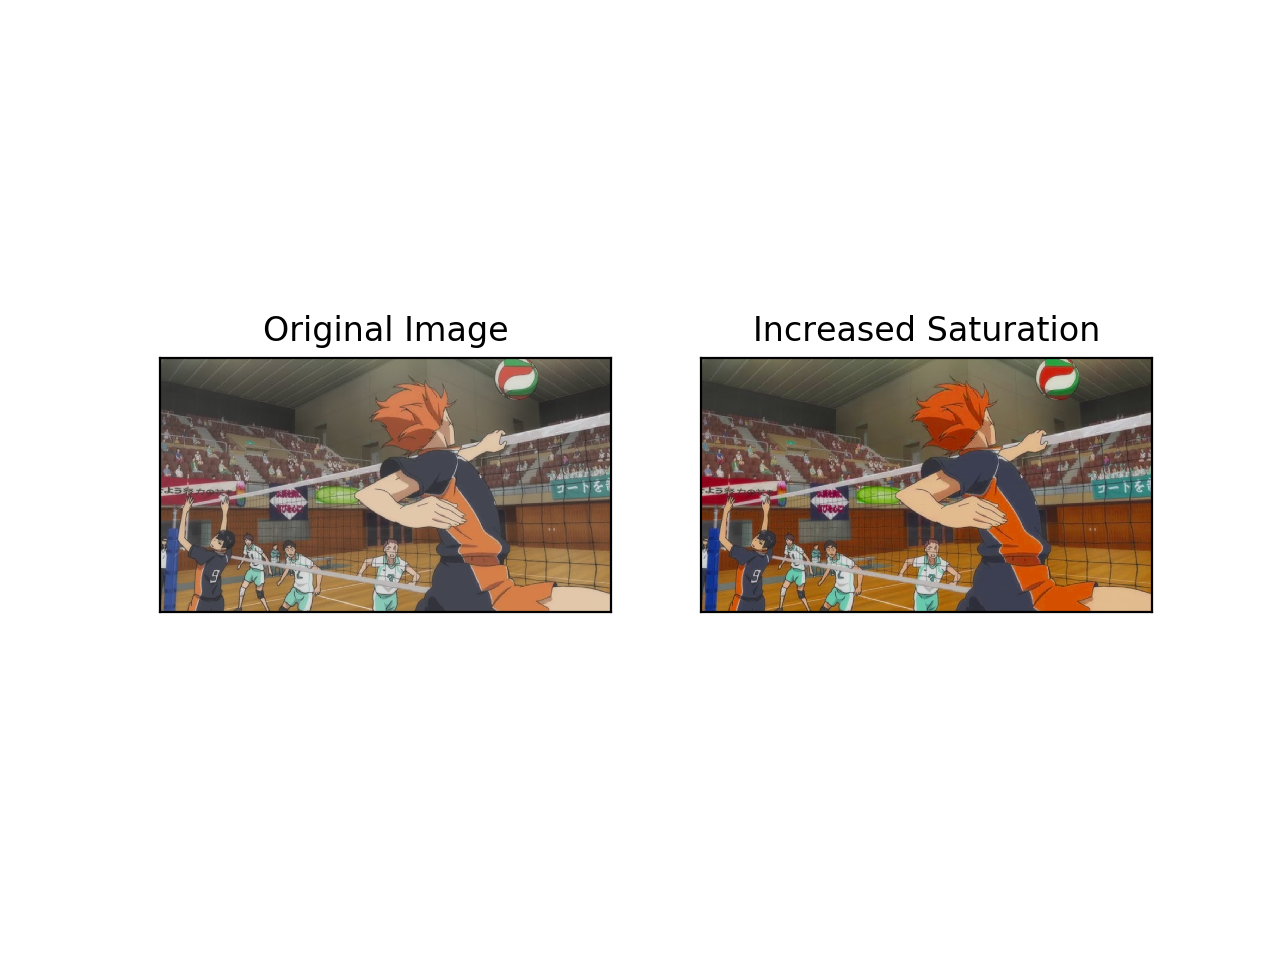

In [143]:
import cv2
import numpy as np

image = cv2.imread("./pics/hinata.jpg", cv2.IMREAD_COLOR)
saturation_multiplier = 1.5

hsv_components = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32))

hsv_components[1] *= saturation_multiplier

hsv = cv2.merge(hsv_components)
hsv = np.clip(hsv, 0, 255)
hsv = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hsv)
axes[1].set_title('Increased Saturation'), axes[1].set_xticks([]), axes[1].set_yticks([]);

Enhances the saturation of the image by doing the following:
* Converting image to HSV components
* Scaling the saturation component of the image, while not touching the hue and value
* Translating the image back to RGB for display

#### Color shift

<IPython.core.display.Javascript object>


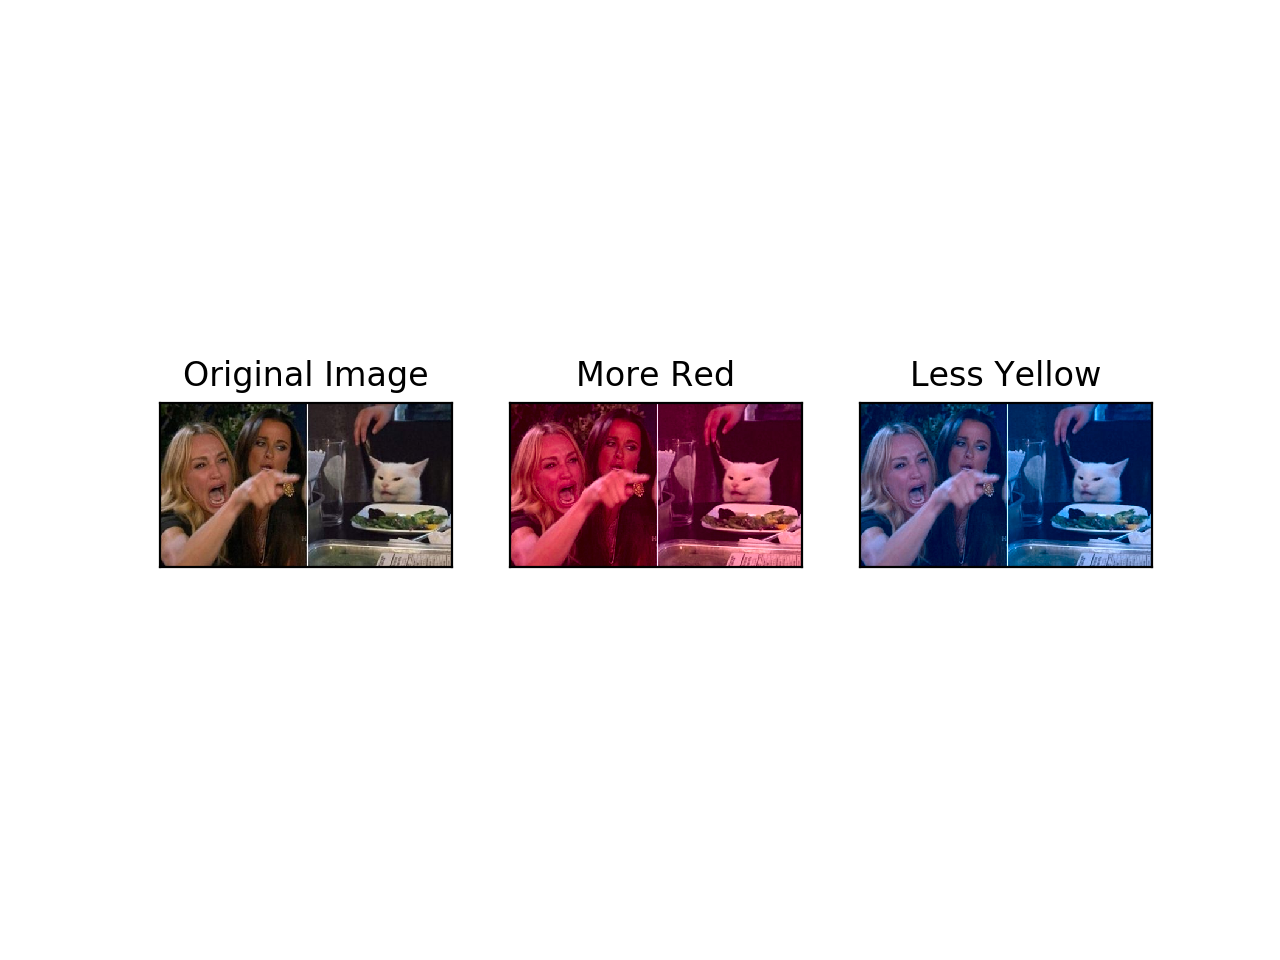

In [144]:
import cv2
import numpy as np

image = cv2.imread("./pics/catmeme.jpg", cv2.IMREAD_COLOR)

l = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB).astype(np.float32))

more_red = cv2.merge((l[0], l[1] + 40, l[2]))
more_red = np.clip(more_red, 0, 255)
more_red = cv2.cvtColor(more_red.astype(np.uint8), cv2.COLOR_LAB2RGB)

less_yellow = cv2.merge((l[0], l[1], l[2] - 40))
less_yellow = np.clip(less_yellow, 0, 255)
less_yellow = cv2.cvtColor(less_yellow.astype(np.uint8), cv2.COLOR_LAB2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(image)
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(more_red)
axes[1].set_title('More Red'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(less_yellow)
axes[2].set_title('Less Yellow'), axes[2].set_xticks([]), axes[2].set_yticks([]);

Makes the original image more red by:
* converting the image to LAB values
* increasing the A (R,G) value
* converting the image back to RGB

Makes the original image less yellow by:
* converting the image to LAB values
* decreasing the B (B,Y) value
* converting the image back to RGB

Bells and Whistles:
For project 1, I've decided to do all three types of image enhancement.
I was able to successfully implement contrast enhancement, saturation enhancement, and red and yellow image modifications.

Grading:
Following the rubric:
* 45 points for implementation to create hybrid images from two aligned input images.
* 25 points for illustration and additional results: 15 points for FFT images; 10 points for including at least two examples beyond the first (including at least one failure).
* 10 points for quality of results (e.g., 0=poor 5=average 10=great 15=amazing)
* 20 points for two image enhancement tasks (10 pts each), including explanation and display of results.

I believe that I should receive 100 points for hte project. I was able to successfully implement hybrid images, with all the required FFT images and examples. Furthermore, the quality of the hybrid images produced is very good, and contains the high frequency details up close, and low frequency details from afar.

The image enhancement tasks were successfully implemented, with an explanation provided. The example results displayed follow the requirements of the project.